<a href="https://colab.research.google.com/github/yebiFesseha/Excel-for-Excel-In-MachineLearning/blob/main/svm_on_Banking_classification_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bank Marketing Data Set
https://archive.ics.uci.edu/ml/datasets/bank+marketing

Abstract: The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).



# New Section

In [ ]:
import pandas as pd
import numpy as np
import os

In [ ]:
print(os.listdir())

['.config', 'sample_data']


In [ ]:
# [os.chdir('sample_data')
os.chdir('sample_data')

In [21]:
df = pd.read_csv('bank-full.csv', sep=";")
df.tail(2)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


In [33]:
#df['isSubsribed']= pd.get_dummies(df['y'], drop_first=True))
df['isSubscribed'] = np.where(df['y']=='no', 0, 1)
df.head(2)

,age,ageGroup,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,isSubscribed
0,58,55-65,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,0
1,44,35-45,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,0


# EDA

In [ ]:
df.shape

(45211, 17)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   age           45211 non-null  int64   
 1   ageGroup      45199 non-null  category
 2   job           45211 non-null  object  
 3   marital       45211 non-null  object  
 4   education     45211 non-null  object  
 5   default       45211 non-null  object  
 6   balance       45211 non-null  int64   
 7   housing       45211 non-null  object  
 8   loan          45211 non-null  object  
 9   contact       45211 non-null  object  
 10  day           45211 non-null  int64   
 11  month         45211 non-null  object  
 12  duration      45211 non-null  int64   
 13  campaign      45211 non-null  int64   
 14  pdays         45211 non-null  int64   
 15  previous      45211 non-null  int64   
 16  poutcome      45211 non-null  object  
 17  y             45211 non-null  object  
 18  isSubs

In [35]:
df.select_dtypes(include='object').info() 
df.select_dtypes(exclude='object').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   job        45211 non-null  object
 1   marital    45211 non-null  object
 2   education  45211 non-null  object
 3   default    45211 non-null  object
 4   housing    45211 non-null  object
 5   loan       45211 non-null  object
 6   contact    45211 non-null  object
 7   month      45211 non-null  object
 8   poutcome   45211 non-null  object
 9   y          45211 non-null  object
dtypes: object(10)
memory usage: 3.4+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   age           45211 non-null  int64   
 1   ageGroup      45199 non-null  category
 2   balance       45211 non-null  int64   
 3   day           45211 non-null  int64   
 4   durat

In [36]:
# Figuring out the categories per feature as follows
[(col,df[col].unique()) for col in df.select_dtypes(include='object').columns]

[('job', array(['management', 'technician', 'entrepreneur', 'blue-collar',
         'unknown', 'retired', 'admin.', 'services', 'self-employed',
         'unemployed', 'housemaid', 'student'], dtype=object)),
 ('marital', array(['married', 'single', 'divorced'], dtype=object)),
 ('education',
  array(['tertiary', 'secondary', 'unknown', 'primary'], dtype=object)),
 ('default', array(['no', 'yes'], dtype=object)),
 ('housing', array(['yes', 'no'], dtype=object)),
 ('loan', array(['no', 'yes'], dtype=object)),
 ('contact', array(['unknown', 'cellular', 'telephone'], dtype=object)),
 ('month',
  array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'jan', 'feb',
         'mar', 'apr', 'sep'], dtype=object)),
 ('poutcome', array(['unknown', 'failure', 'other', 'success'], dtype=object)),
 ('y', array(['no', 'yes'], dtype=object))]

In [ ]:
#or  
[f"Column '{col}' has {df[col].nunique()} unique values:{df[col].unique()}" for col in df.select_dtypes(include='object').columns ]

["Column 'job' has 12 unique values:['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'\n 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'\n 'student']",
 "Column 'marital' has 3 unique values:['married' 'single' 'divorced']",
 "Column 'education' has 4 unique values:['tertiary' 'secondary' 'unknown' 'primary']",
 "Column 'default' has 2 unique values:['no' 'yes']",
 "Column 'housing' has 2 unique values:['yes' 'no']",
 "Column 'loan' has 2 unique values:['no' 'yes']",
 "Column 'contact' has 3 unique values:['unknown' 'cellular' 'telephone']",
 "Column 'month' has 12 unique values:['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']",
 "Column 'poutcome' has 4 unique values:['unknown' 'failure' 'other' 'success']",
 "Column 'y' has 2 unique values:['no' 'yes']"]

In [ ]:
#or 
for col in df.select_dtypes(include='object').columns:
  print(f"Column '{col}' has the following {df[col].nunique()} unique values:\n{df[col].unique()}\n")

Column 'job' has the following 12 unique values:
['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']

Column 'marital' has the following 3 unique values:
['married' 'single' 'divorced']

Column 'education' has the following 4 unique values:
['tertiary' 'secondary' 'unknown' 'primary']

Column 'default' has the following 2 unique values:
['no' 'yes']

Column 'housing' has the following 2 unique values:
['yes' 'no']

Column 'loan' has the following 2 unique values:
['no' 'yes']

Column 'contact' has the following 3 unique values:
['unknown' 'cellular' 'telephone']

Column 'month' has the following 12 unique values:
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']

Column 'poutcome' has the following 4 unique values:
['unknown' 'failure' 'other' 'success']

Column 'y' has the following 2 unique values:
['no' 'yes']



In [37]:
# get the stat for numerical values
df.select_dtypes(include='number').describe().T

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0
isSubscribed,45211.0,0.116985,0.321406,0.0,0.0,0.0,0.0,1.0


In [48]:
#or
df.select_dtypes(exclude='object').drop('ageGroup', axis=1).aggregate(['count','sum', 'average', 'min', 'max', 'median', 
                                                                       np.sum, np.min, np.max, np.median, np.mean])

,age,balance,day,duration,campaign,pdays,previous,isSubscribed
count,4.521100e+04,4.521100e+04,45211.000000,4.521100e+04,45211.000000,4.521100e+04,45211.000000,45211.000000
sum,1.850767e+06,6.158968e+07,714624.000000,1.167181e+07,124956.000000,1.817384e+06,26237.000000,5289.000000
average,4.093621e+01,1.362272e+03,15.806419,2.581631e+02,2.763841,4.019783e+01,0.580323,0.116985
min,1.800000e+01,-8.019000e+03,1.000000,0.000000e+00,1.000000,-1.000000e+00,0.000000,0.000000
max,9.500000e+01,1.021270e+05,31.000000,4.918000e+03,63.000000,8.710000e+02,275.000000,1.000000
median,3.900000e+01,4.480000e+02,16.000000,1.800000e+02,2.000000,-1.000000e+00,0.000000,0.000000
sum,1.850767e+06,6.158968e+07,714624.000000,1.167181e+07,124956.000000,1.817384e+06,26237.000000,5289.000000
amin,1.800000e+01,-8.019000e+03,1.000000,0.000000e+00,1.000000,-1.000000e+00,0.000000,0.000000
amax,9.500000e+01,1.021270e+05,31.000000,4.918000e+03,63.000000,8.710000e+02,275.000000,1.000000
median,3.900000e+01,4.480000e+02,16.000000,1.800000e+02,2.000000,-1.000000e+00,0.000000,0.000000


# Viz
Find relationship
Counts
Bucketisze Age 

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:

np.digitize(df['age'], bins=[15,25,35,45,55,65,75,85,95,100])

array([5, 3, 2, ..., 6, 5, 3])

In [ ]:
df['age']

0        58
1        44
2        33
3        47
4        33
         ..
45206    51
45207    71
45208    72
45209    57
45210    37
Name: age, Length: 45211, dtype: int64

In [ ]:
pd.cut(df['age'], bins=[18,25,35,45,55,65,75,85,95,100])

0        (55, 65]
1        (35, 45]
2        (25, 35]
3        (45, 55]
4        (25, 35]
           ...   
45206    (45, 55]
45207    (65, 75]
45208    (65, 75]
45209    (55, 65]
45210    (35, 45]
Name: age, Length: 45211, dtype: category
Categories (9, interval[int64, right]): [(18, 25] < (25, 35] < (35, 45] < (45, 55] ... (65, 75] <
                                         (75, 85] < (85, 95] < (95, 100]]

In [32]:
df['ageGroup']= pd.cut(df['age'], 
                       bins=[18, 25,35,45,55,65,75,85,95,105], 
                       labels=['<25',
                               '25-35',
                               '35-45',
                               '45-55',
                               '55-65',
                               '65-75',
                               '75-85',
                               '85-95',
                               '>95'])
df = df[['age', 'ageGroup', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y']]
df[10000:10002]

,age,ageGroup,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
10000,38,35-45,admin.,married,primary,no,1487,no,no,unknown,9,jun,332,2,-1,0,unknown,no
10001,39,35-45,blue-collar,married,secondary,no,138,no,no,unknown,9,jun,61,2,-1,0,unknown,no


In [ ]:
df['ageGroup'].value_counts()

25-35    15571
35-45    13856
45-55     9548
55-65     4149
<25       1324
65-75      490
75-85      234
85-95       27
>95          0
Name: ageGroup, dtype: int64

In [ ]:
df.loc[df['ageGroup'] == '85-95'].iloc[10:15,:2]

,age,ageGroup
42081,87,85-95
42460,86,85-95
42494,87,85-95
42574,89,85-95
42635,87,85-95


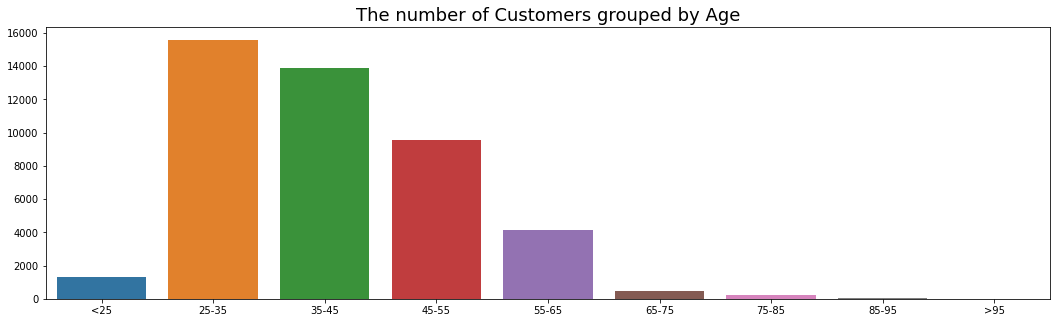

In [ ]:
#Seaborbn Count plot
from numpy.core.fromnumeric import size
plt.figure(figsize=(18,5))
sns.countplot(x = df['ageGroup'])
plt.title("The number of Customers grouped by Age", size=18)
plt.ylabel("")
plt.xlabel("")
plt.show()

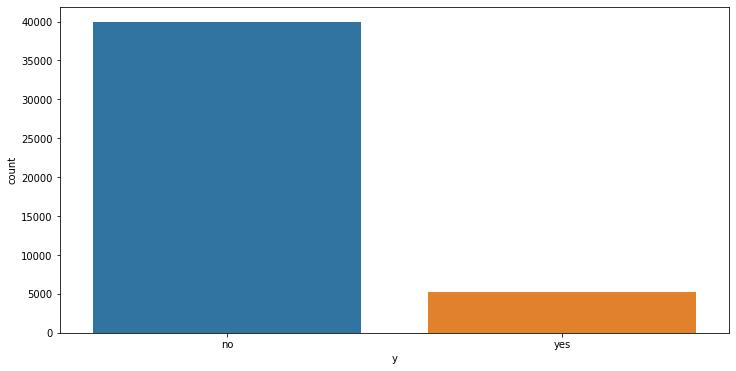

In [30]:
plt.figure(figsize=(12,6))
sns.countplot(x=df['y'])
plt.show()

In [ ]:
df.select_dtypes(exclude=['object', 'category']).drop(['day', 'previous'], axis=1).head(1)

,age,balance,duration,campaign,pdays
0,58,2143,261,1,-1


In [ ]:
# # df.select_dtypes(exclude=['object', 'category'])
# fig, axes = plt.subplots(2,4, sharex=True, figsize=(18,12) )
# for col in df.select_dtypes(exclude=['object', 'category']).columns:
#   sns.kdeplot(col)

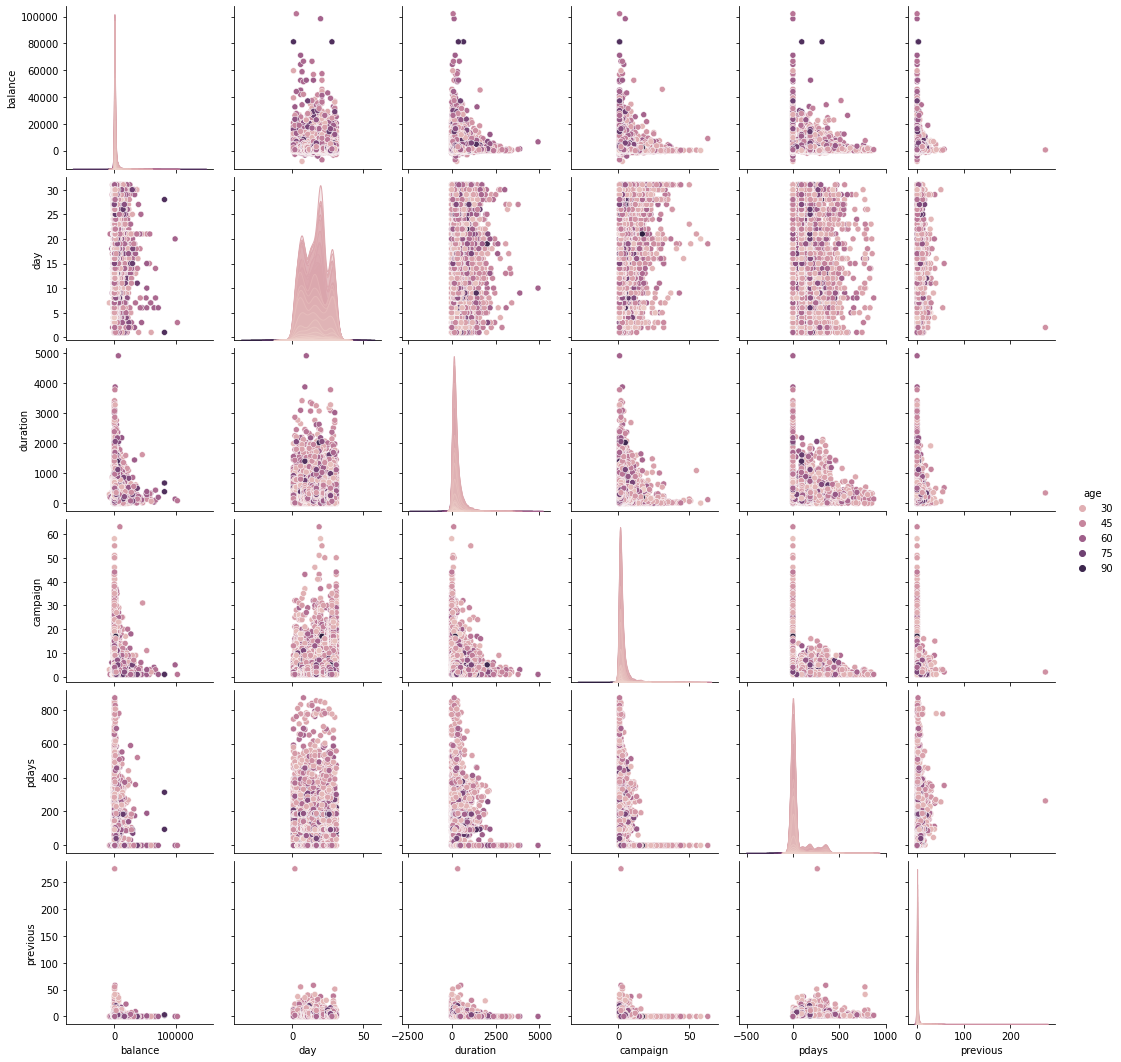

In [ ]:
sns.pairplot(df.select_dtypes(exclude=['object', 'category']), hue='age')

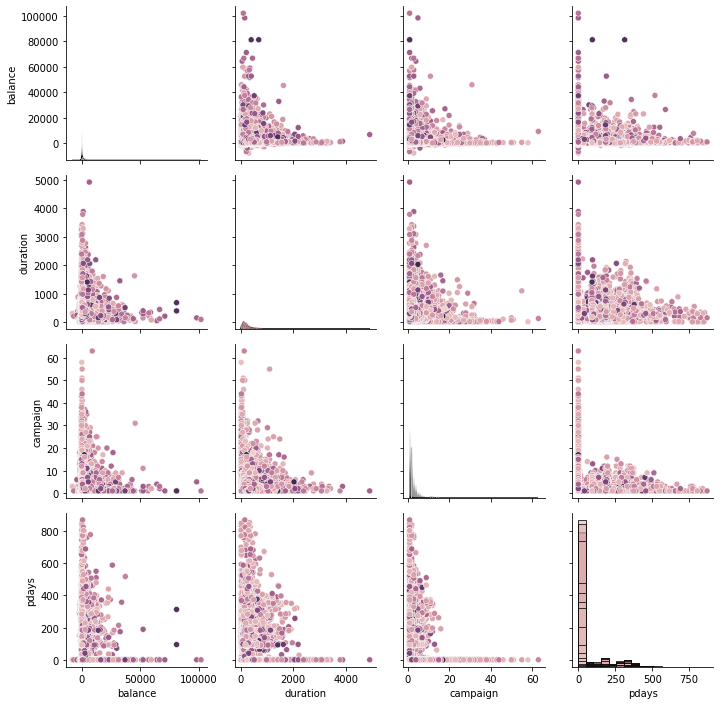

In [ ]:
fig = sns.PairGrid(df.select_dtypes(exclude=['object', 'category']).drop(['day', 'previous'], axis=1), hue='age')
fig.map_diag(sns.histplot)
fig.map_offdiag(sns.scatterplot)

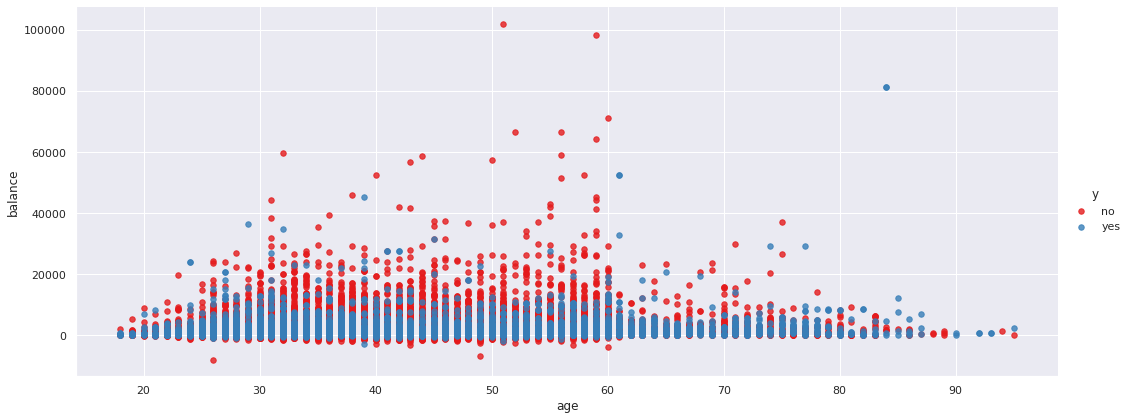

In [ ]:
sns.lmplot(x='age', y='balance', data=df, hue='y', palette='Set1', fit_reg=False, scatter_kws={"s":30}, height=6, aspect=2.5)
plt.show()

# Modelling using SVM

In [ ]:
from sklearn import svm
from sklearn.utils import shuffle
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

In [ ]:
# First lets use two dimensional data
df[['age', 'balance']].head(1)

,age,balance
0,58,2143


In [ ]:
#encode the target feature using numpy
np.where(df['y']=='no', 0, 1)

array([0, 0, 0, ..., 1, 0, 0])

In [ ]:
#or encode using pandas dummy variable
pd.get_dummies(df['y'], drop_first=True).to_numpy()[-3:]

array([[1],
       [0],
       [0]], dtype=uint8)

In [ ]:
# or onehot encoding from sklearn
ohe = OneHotEncoder(drop='first')
ohe.fit_transform(df[['y']]).toarray()[-3:]

array([[1.],
       [0.],
       [0.]])

In [ ]:
#instantiate the model
clf =  svm.SVC(kernel='linear')

In [ ]:
#shuffle and extract a 1000 points
# shuffle(df[['age', 'balance', 'y']].to_numpy(), random_state=3)[:1000]
# shuffle(df[['age', 'balance', 'y']], random_state=3)[:1000].iloc[:,:2].to_numpy()
#fit the model np.where(df['y']=='no', 0, 1)
clf.fit(
    shuffle(df[['age', 'balance', 'y']], random_state=3)[:300].iloc[:,:2].to_numpy(),
    np.where(shuffle(df[['age', 'balance', 'y']], random_state=3)[:300].iloc[:,2]=='no', 0, 1)
        )

SVC(kernel='linear')

#### Create a Hyperplane

In [ ]:
w = clf.coef_[0]

a = -w[0]/ w[1]
print('w:', w)
print('a:', a)

w: [-0.00344074 -0.00052692]
a: -6.529914097802626


In [ ]:
# https://www.youtube.com/watch?v=N1vOgolbjSc
xx = np.linspace(5,300)
yy = a * xx - (clf.intercept_[0]/ w[1])

b = clf.support_vectors_[0]
yy_down = a * xx + (b[1] - a * b[0])

b = clf.support_vectors_[-1]
yy_up = a * xx + (b[1] - a * b[0])

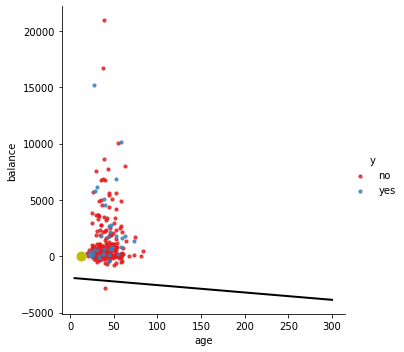

In [ ]:
sns.lmplot(
    x = 'age',
    y = 'balance',
    data = shuffle(df[['age', 'balance', 'y']], random_state=3)[:300],
    hue = 'y',
    palette = 'Set1',
    fit_reg=False,
    scatter_kws={"s":10}
)
plt.plot(xx, yy, linewidth=2, color='black')
plt.plot(12,12, 'yo', markersize='9')
plt.show()

# Tasks
  * Use a shuffled 10000 data points, use that for train and test
  * Use another 10000 shuffled data for prediction and scoring
  * drop less important features which wont affect the modelling
  * Import trainer and tester, Scalar, Encoder and imputer packages
  * import Transformers, Pipile and scoring packages
  * Convert categorical into numerical, impute missing values,scale numerical,
  * instantiate the model, train_test_split, fit_transform, predict, score


In [ ]:
from sklearn import svm
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler, MaxAbsScaler, RobustScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer, ColumnTransformer
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn import metrics

In [50]:
data = shuffle(df, random_state=3)[:10000]
data = data.drop(['ageGroup', 'default', 'pdays', 'previous', 'poutcome', 'y'], axis=1)
print(data.shape)
data.head()

(10000, 13)


,age,job,marital,education,balance,housing,loan,contact,day,month,duration,campaign,isSubscribed
11465,35,management,single,tertiary,2808,yes,no,unknown,19,jun,221,12,0
30430,31,blue-collar,single,secondary,573,yes,no,telephone,5,feb,58,1,0
19738,32,management,married,tertiary,183,yes,no,cellular,7,aug,112,3,0
13353,47,management,married,tertiary,1890,no,no,cellular,8,jul,161,1,0
18408,43,services,divorced,secondary,0,no,no,cellular,31,jul,106,4,0


In [53]:
# Verify number of yess and Nos
data['isSubscribed'].value_counts()

0    8818
1    1182
Name: isSubscribed, dtype: int64

In [57]:
X = data.drop('isSubscribed', axis=1)
y = data['isSubscribed']


Steps

1.   get categorical and numerical features separated
2.   train_test_split 
3.   scaling and imputing the numeric features then fit transforming them
4.   imputing and then ecncoding the categorical features and fit-transforming them
5.   Preprocessing and Column-transforming
6.   training using the svm model
7.   fitting and then predicting
8.   checking accuracy






In [68]:
numColumns = X.select_dtypes(include='number').columns
catColumns = X.select_dtypes(exclude='number').columns

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 3, test_size=0.25)

In [75]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(7500, 12) (2500, 12) (7500,) (2500,)


In [96]:
# scaling and imputing the numeric features then fit transforming the numerical features
Pipeline(steps=[
                
                ('imputer', SimpleImputer(strategy='mean')),
                ('ss', StandardScaler())

]).fit_transform(X[numColumns])

array([[-0.55740759,  0.4687719 ,  0.4027581 , -0.14211041,  3.08229973],
       [-0.93344361, -0.25741998, -1.28965521, -0.77822707, -0.58012866],
       [-0.83943461, -0.38413802, -1.04788188, -0.56748904,  0.08576741],
       ...,
       [ 1.3227725 , -0.43222589,  0.52364477, -0.51285325,  0.41871545],
       [ 1.2287635 ,  1.43670281,  0.64453143, -0.06796185, -0.24718062],
       [ 1.1347545 , -0.44359803, -1.04788188, -0.31772544, -0.58012866]])

In [95]:
# imputing and then ecncoding the categorical features and fit-transforming them
Pipeline(steps=[
                
                ('imputer', SimpleImputer(strategy='most_frequent')),
                ('ohe', OneHotEncoder(handle_unknown='ignore', sparse=False)) # ignore unknow to zero

]).fit_transform(X[catColumns])

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

In [90]:
# Preprocessing and Column-transforming
ColumnTransformer(transformers=[
                                ('num', Pipeline(steps=[('imputer', SimpleImputer(strategy='mean')), ('mm', MinMaxScaler())]), numColumns),
                                ('cat', Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')), ('ohe', OneHotEncoder(handle_unknown='ignore', sparse=False))]), catColumns)
]).get_params

<bound method ColumnTransformer.get_params of ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer', SimpleImputer()),
                                                 ('mm', MinMaxScaler())]),
                                 Index(['age', 'balance', 'day', 'duration', 'campaign'], dtype='object')),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ohe',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 Index(['job', 'marital', 'education', 'housing', 'loan', 'contact', 'month'], dtype='object'))])>

In [98]:
# training using the svm model, use SVC since this is a classification problem not a regression one
Pipeline([
          ('preprocessor', ColumnTransformer(transformers=[
                                ('num', Pipeline(steps=[('imputer', SimpleImputer(strategy='mean')), ('mm', MinMaxScaler())]), numColumns),
                                ('cat', Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')), ('ohe', OneHotEncoder(handle_unknown='ignore', sparse=False))]), catColumns)
                                                          ])
          ),
        ('model', svm.SVC(kernel='rbf'))
]).fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('mm',
                                                                   MinMaxScaler())]),
                                                  Index(['age', 'balance', 'day', 'duration', 'campaign'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                       

In [100]:
#fittig and then predicting
Pipeline([
          ('preprocessor', ColumnTransformer(transformers=[
                                ('num', Pipeline(steps=[('imputer', SimpleImputer(strategy='mean')), ('ss', StandardScaler())]), numColumns),
                                ('cat', Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')), ('ohe', OneHotEncoder(handle_unknown='ignore', sparse=False))]), catColumns)
                                                          ])
          ),
        ('model', svm.SVC(kernel='rbf'))
]).fit(X_train, y_train).predict(X_test)

array([0, 0, 0, ..., 0, 0, 1])

In [120]:
print(f"the {numColumns}\n{catColumns}")

the Index(['age', 'balance', 'day', 'duration', 'campaign'], dtype='object')
Index(['job', 'marital', 'education', 'housing', 'loan', 'contact', 'month'], dtype='object')


In [128]:
#checking accuracy
print("the accuracy using Standard Scalar and the kernel Gaussian rbf is:")
metrics.accuracy_score(y_test,
                       Pipeline([('preprocessor', ColumnTransformer(transformers=[
                                ('num', Pipeline(steps=[('imputer', SimpleImputer(strategy='mean')), ('ss', StandardScaler())]), numColumns),
                                ('cat', Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')), ('ohe', OneHotEncoder(handle_unknown='ignore', sparse=False))]), catColumns)
                                ])), ('model', svm.SVC(kernel='rbf'))]).fit(X_train, y_train).predict(X_test)
                      ) *100 

the accuracy using Standard Scalar and the kernel Gaussian rbf is:


89.44

In [135]:
#checking accuracy
print("the accuracy is using Robust Scalar and the kernel rbf is:")
metrics.accuracy_score(y_test,
                       Pipeline([('preprocessor', ColumnTransformer(transformers=[
                                ('num', Pipeline(steps=[('imputer', SimpleImputer(strategy='mean')), ('ra', RobustScaler())]), numColumns),
                                ('cat', Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')), ('ohe', OneHotEncoder(handle_unknown='ignore', sparse=False))]), catColumns)
                                ])), ('model', svm.SVC(kernel='rbf'))]).fit(X_train, y_train).predict(X_test)
                      ) *100 

the accuracy is using Robust Scalar and the kernel rbf is:


89.36